

> **Step 1: Loading the Dataset**



In [54]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder






**Step 2: Loading the Dataset**

In [52]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv("kidney_disease.csv")

# Display the first few rows of the dataset
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


**Step 2: Description of the Dataset**

In [2]:
# Display the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", df.shape)

# Display the column names and data types
print("Column names and data types:")
print(df.dtypes)

# Display basic statistics of numerical columns
print("Basic statistics of numerical columns:")
print(df.describe())

# Display any missing values in the dataset
print("Missing values in the dataset:")
print(df.isnull().sum())


Shape of the dataset: (400, 26)
Column names and data types:
id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object
Basic statistics of numerical columns:
               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.0

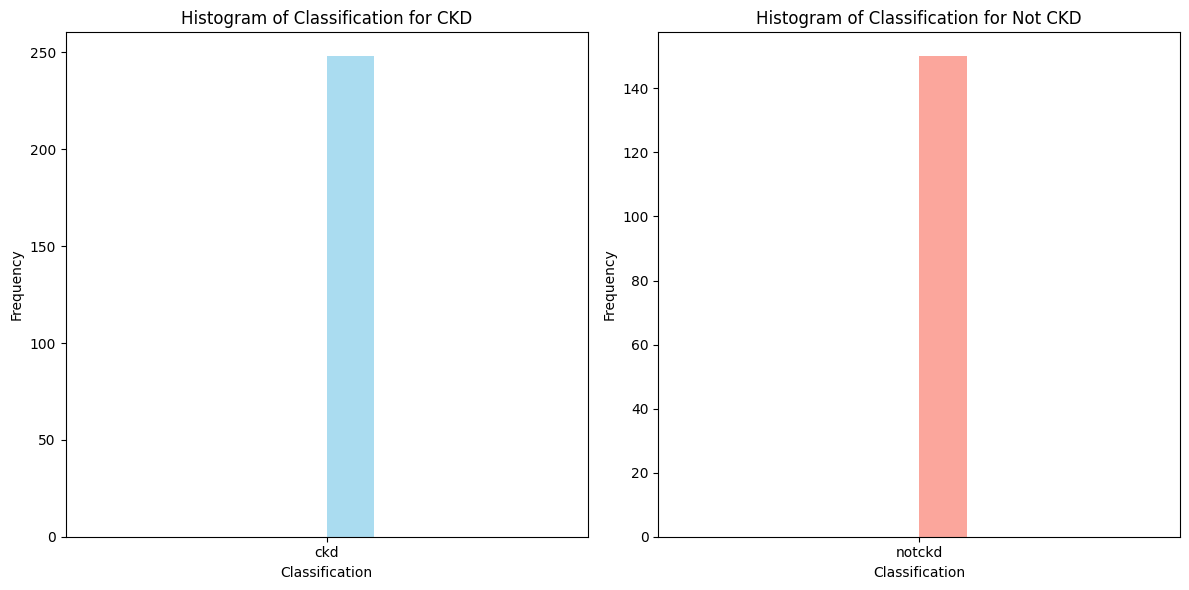

In [4]:
# Assuming you have loaded your dataset into a DataFrame named 'df'
# Replace 'df' with your actual DataFrame if different

# Separate the dataset into 'ckd' and 'notckd' classes
ckd_data = df[df['classification'] == 'ckd']
notckd_data = df[df['classification'] == 'notckd']

# Plot histograms for each class
plt.figure(figsize=(12, 6))

# Histogram for 'ckd' class
plt.subplot(1, 2, 1)
plt.hist(ckd_data['classification'], color='skyblue', alpha=0.7)
plt.title('Histogram of Classification for CKD')
plt.xlabel('Classification')
plt.ylabel('Frequency')

# Histogram for 'notckd' class
plt.subplot(1, 2, 2)
plt.hist(notckd_data['classification'], color='salmon', alpha=0.7)
plt.title('Histogram of Classification for Not CKD')
plt.xlabel('Classification')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##  Data Preprocessing

In [6]:
# Separate features and target variable
X = df.drop('classification', axis=1)  # Features
y = df['classification']  # Target variable


# Model Eveluation

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg_model = LogisticRegression()

# Train the logistic regression model
log_reg_model.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = log_reg_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report

# After training the model and making predictions

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Assuming the data set was snall.

In [11]:
# Step 1: Assessing Dataset Size
num_records = len(df)
print("Number of records in the dataset:", num_records)

Number of records in the dataset: 400


In [12]:
# # Step 3: Performing Rigorous Cross-Validation
# # Split the data into features and target variable
# X = df.drop('classification', axis=1)
# y = df['classification']

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable
X = df.drop('classification', axis=1)  # Features
y = df['classification']  # Target variable

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Apply preprocessing to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform features using the preprocessor
X_preprocessed = preprocessor.fit_transform(X)

# Display the processed feature matrix
print("Processed Feature Matrix:")
print(X_preprocessed)


Processed Feature Matrix:
  (0, 0)	-1.7277260797023903
  (0, 1)	-0.20546364055756902
  (0, 2)	0.26233835705734787
  (0, 3)	0.48335471355144
  (0, 4)	-0.013338159656279566
  (0, 5)	-0.43779689860601223
  (0, 6)	-0.36198746124189723
  (0, 7)	-0.4352676906916978
  (0, 8)	-0.3337432259755716
  (0, 11)	1.0592712030899971
  (0, 13)	1.0
  (0, 15)	1.0
  (0, 16)	1.0
  (0, 18)	1.0
  (0, 52)	1.0
  (0, 136)	1.0
  (0, 190)	1.0
  (0, 206)	1.0
  (0, 211)	1.0
  (0, 213)	1.0
  (0, 215)	1.0
  (0, 217)	1.0
  (0, 219)	1.0
  (1, 0)	-1.7190657986011253
  (1, 1)	-2.6238099120541896
  :	:
  (399, 0)	1.7277260797023903
  (399, 1)	0.38437691346599695
  (399, 2)	0.26233835705734787
  (399, 3)	1.4157274670140096
  (399, 4)	-0.800289579376776
  (399, 5)	-0.43779689860601223
  (399, 6)	-0.22809911194099816
  (399, 7)	-0.8009411793681561
  (399, 8)	-0.3515670641612571
  (399, 9)	0.3776064712985508
  (399, 10)	-0.4002632276707331
  (399, 11)	1.206721754560125
  (399, 13)	1.0
  (399, 15)	1.0
  (399, 16)	1.0
  (399, 18

## Cross-Validation Scores

In [21]:
from sklearn.model_selection import cross_val_score

# Define the logistic regression model
log_reg_model = LogisticRegression()

# Perform k-fold cross-validation
cv_scores = cross_val_score(log_reg_model, X_processed, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1.     1.     1.     0.9875 0.9875]
Mean CV Accuracy: 0.9949999999999999


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


**Address Class Imbalance:**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model with class weights
class_weights = {'ckd': 1, 'notckd': 5}  # Adjust the weights as needed
log_reg_model = LogisticRegression(class_weight=class_weights)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', log_reg_model)])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model's performance on the testing data
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


## **Apply Data Augmentation** (model overfit with the data after preprocessing step.)


In [39]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming you have already preprocessed your data and defined features (X) and target (y)

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply RandomOverSampler to perform oversampling on the preprocessed training data
ros = RandomOverSampler()
X_train_augmented, y_train_augmented = ros.fit_resample(X_train_preprocessed, y_train)

# Initialize and train the logistic regression model on the augmented training data
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_augmented, y_train_augmented)

# Apply preprocessing to the testing data
X_test_preprocessed = preprocessor.transform(X_test)

# Evaluate the model on the original testing set
y_pred = log_reg_model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original testing set:", accuracy)


Accuracy on original testing set: 0.975


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# Print the number of records in the original dataset
print("Number of records in the original dataset:", len(X))

# Print the number of records in the training and testing sets
print("Number of records in the training set:", X_train_augmented.shape[0])
print("Number of records in the testing set:", len(X_test))


Number of records in the original dataset: 400
Number of records in the training set: 588
Number of records in the testing set: 80


In [43]:
# After training the model and making predictions

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      0.96      0.98        52
        ckd	       0.00      0.00      0.00         0
      notckd       0.97      1.00      0.98        28

    accuracy                           0.97        80
   macro avg       0.66      0.65      0.65        80
weighted avg       0.99      0.97      0.98        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


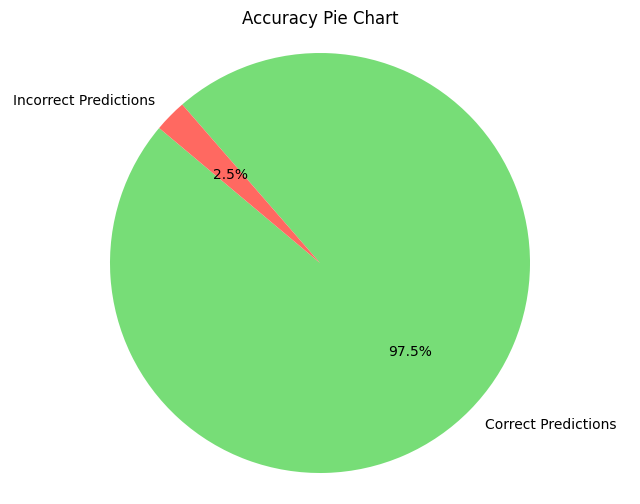

In [44]:
# Calculate correct and incorrect predictions
correct_predictions = (y_pred == y_test).sum()
incorrect_predictions = len(y_test) - correct_predictions

# Calculate percentages
total_predictions = len(y_test)
correct_percentage = (correct_predictions / total_predictions) * 100
incorrect_percentage = (incorrect_predictions / total_predictions) * 100

# Create labels and values for the pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct_percentage, incorrect_percentage]
colors = ['#77DD77', '#FF6961']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [51]:
# Choose a random subset of samples from the test dataset
sample_indices = random.sample(range(len(X_test)), 5)
sample_X = X_test.iloc[sample_indices]
sample_y_true = y_test.iloc[sample_indices]

# Preprocess the selected samples
sample_X_processed = preprocessor.transform(sample_X)

# Predict labels for the selected samples
sample_y_pred = log_reg_model.predict(sample_X_processed)

# Compare predicted labels with actual labels
for i in range(len(sample_indices)):
    print(f"Sample {i+1}:")
    print("Input data:", sample_X.iloc[i])
    print("True label:", sample_y_true.iloc[i])
    print("Predicted label:", sample_y_pred[i])
    print()

Sample 1:
Input data: id              246
age            48.0
bp            110.0
sg            1.015
al              3.0
su              0.0
rbc        abnormal
pc           normal
pcc         present
ba       notpresent
bgr           106.0
bu            215.0
sc             15.2
sod           120.0
pot             5.7
hemo            8.6
pcv              26
wc             5000
rc              2.5
htn             yes
dm               no
cad             yes
appet          good
pe               no
ane             yes
Name: 246, dtype: object
True label: ckd
Predicted label: ckd

Sample 2:
Input data: id              227
age            57.0
bp             80.0
sg            1.015
al              0.0
su              0.0
rbc             NaN
pc           normal
pcc      notpresent
ba       notpresent
bgr           120.0
bu             48.0
sc              1.6
sod             NaN
pot             NaN
hemo           11.3
pcv              36
wc             7200
rc              3.8
htn          